In [2]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

from bisect import insort

**Q1** Quicksort vs. Insertion Sort: Quicksort has an expected runtime of Q(nlog n);
insertion sort has an expected run time of Q(n2). 
As such, we know that Quicksort willbe faster forvery large n. 
Insertion sort, however,  turns  out  to  be  faster  for  small n.
Your  job  is  to  figure  out how  small.
Compare implementations of Quicksort and Insertion sort,testingeach with a range of values for n.
Provide a graph of the results, clearly indicating where the lines cross.
You may use your own implementations, in any language you choose, or ones that you find elsewhere, 
as long as you cite your sources.You must use a wide enough range of values for n to provide a convincing arguement
for your answer.

**Hypothesis:** 
The crossover point at which Quicksort becomes faster than Insertion Sort will be very low n<=10 for randomly generated data.With a nearly sorted array it has been shown that insertion sort can run close to O(n), but the data is randomly generated, so Quicksort (with a random pivot) is expected to be much faster.

**Methods:**
The data is generated using the nummpy random and the test cases will scale from lists of length 1 to 1000 where it's expected that Quicksort will become significantly faster than insertion sort. After collecting timing data in another list a value with the average of the last five seen values will be used to determined where the switch (crossover) point is for Insertion Sort overtaking Quicksort.

In [3]:
def insertion_sort(items):
    for i in range(1, len(items)):
        curr = items[i]
        pos = i

        while pos > 0 and items[pos-1] > curr:
            items[pos] = items[pos-1]
            pos -= 1

        items[pos] = curr

In [4]:
def quicksort( aList, first, last ):
    #http://www.geekviewpoint.com/python/sorting/quicksort
    if first < last:
        pivot = partition( aList, first, last )
        quicksort( aList, first, pivot - 1 )
        quicksort( aList, pivot + 1, last )
    
def partition( lst, first, last ) :
    pivot = first + random.randrange( last - first + 1 )
    swap( lst, pivot, last )
    for i in range( first, last ):
        if lst[i] <= lst[last]:
            swap( lst, i, first )
            first += 1

    swap( lst, first, last )
    return first

In [5]:
def swap(lst, i, j):
    lst[i], lst[j] = lst[j], lst[i]

In [24]:
TESTS = 1000
testcases = []
for i in range(1, TESTS):
    testcases.append([math.floor(n*10000) for n in np.random.random((1, i))[0]])
    
is_times = []
qs_times = []
tested = []

for qs_tst in testcases:
    tested.append(len(qs_tst))
    # duplicate test case for equal gauging of sort alg.
    is_tst = qs_tst[:] # make copy for insertion sort test
    # don't want to account for len() overhead in timing
    n = len(qs_tst)
    # time quicksort(qs)
    qs_start = time.time()
    quicksort(qs_tst, 0, n-1)
    qs_finish  = time.time()
    qs_times.append(qs_finish-qs_start)
    # time insertion sort(is)
    is_start = time.time()
    insertion_sort(is_tst)
    is_finish = time.time()
    is_times.append(is_finish-is_start)

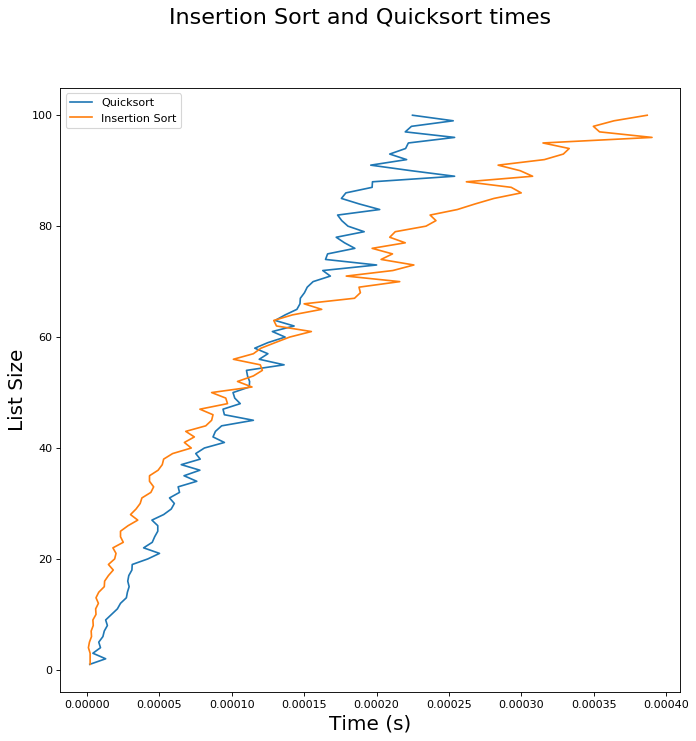

In [33]:
# switch over wouldn't be obvious with larger sample size than 100
fg = plt.figure(num=1, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fg.suptitle('Insertion Sort and Quicksort times', fontsize=20)
plt.ylabel('List Size', fontsize=18)
plt.xlabel('Time (s)', fontsize=18)
plt.plot(qs_times[:100], tested[:100])
plt.plot(is_times[:100], tested[:100])
# plt.plot(qs_times, tested)
# plt.plot(is_times, tested)
plt.legend(['Quicksort', 'Insertion Sort'], loc='upper left')
plt.show()

**Results(1):** For the results the data is presented only with the first 100 tests because it is esier to see where the crossover point occurs. You can observe some specific sizes where Insertion Sort did better and Quicksort did worse such as n=90. 

In [34]:
# find n for where quicksort starts to go faster than insertion sort (sample range of n=5(?))
running_avg = []

SMPLSZ = 5

for i in range(TESTS-1):
    if len(running_avg) >= SMPLSZ:
        running_avg.pop()
        running_avg.append(qs_times[i]-is_times[i])
        
        avg = sum(running_avg)/SMPLSZ
        if avg < 0:
            # finding index of smallest element in sample size
            n = i - running_avg.index(min(running_avg))
            break
    else:
        running_avg.append(qs_times[i]-is_times[i]) 
        
print('switch: ', n)

switch:  56


**Results(2):**
The crossover was calculated using a running average of the last five values in the array and then picking the point with the minimum time from that series to find the exact number of elements where Quicksort became faster than Insertion Sort.

**Discussion:** The switch was significantly higher than expected, n=56 instead of n being smaller than 10. The main factor affecting this is most likely the randomly generated list elements, as insertion sort will perform the best with a nearly sorted list, performing the least swaps, and random pivot Quicksort will perform consistantly weather or not the list is nearly sorted.

**Conclusion:** Under the conditions tested, with random list elements and from list sizes 1-1000 Quicksort starts to perform consistently faster than Insertion Sort at list size 56. 

**Q2** Hybrid sorting: Given the results of part 1, build a Hybrid sorting algorithm. When you recursein Quicksort, 
if a partition size is less than or equal to some constant k, you should use insertion sort,
but if it is greater than k you should continue with Quicksort.  Experimentally determine what
value of k will optimize speed. Is k the same as the crossover point for part 1? Why do you think

**Hypothesis:** The k value, where Insertion Sort sort is most efficient to sort a small partition size within Quicksort will be similar to the k value found in the previous (56) experiment where Quicksort becomes consistently faster than Insertion Sort.

**Methods:** To determine the optomial k value a hybrid Insertion-Quicksort sort algorithm will be tested with k values 4, 10, 30, and 56 the optimal value from the previous experiment. These array sizes will be tested with array sizes 1-1000 with random values. 

In [9]:
def insertion_sort2(items):
    for i in range(1, len(items)):
        curr = items[i]
        pos = i

        while pos > 0 and items[pos-1] > curr:
            items[pos] = items[pos-1]
            pos -= 1

        items[pos] = curr



def quicksort2( aList, first, last ):
    #http://www.geekviewpoint.com/python/sorting/quicksort
    if first < last:
        pivot = partition2( aList, first, last )
        quicksort2( aList, first, pivot - 1 )
        quicksort2( aList, pivot + 1, last )

def partition2( lst, first, last ) :
    pivot = first + random.randrange( last - first + 1)
    swap( lst, pivot, last )
    for i in range( first, last):
        if lst[i] <= lst[last]:
            swap(lst, i, first)
            first += 1

    swap2(lst, first, last)
    return first

def swap2(lst, i, j):
    lst[i], lst[j] = lst[j], lst[i]

# hybrid quickort implementation
def hybrid_sort( lst, first, last, m):
    if last-first > m:
        pivot = partition2( lst, first, last )
        hybrid_sort( lst, first, pivot - 1 , m)
        hybrid_sort( lst, pivot + 1, last, m)
    else:
        insertion_sort2(lst)

In [52]:
TESTS = 1000
testcases = []
for i in range(1, TESTS):
    testcases.append([math.floor(n*10000) for n in np.random.random((1, i))[0]])
    
tested = []
is_times = []
qs_times = []
hs_times_56 = []
hs_times_10 = []
hs_times_30 = []
hs_times_4 = []

for qs_tst in testcases:
    tested.append(len(qs_tst))
    # duplicate test case for equal gauging of sort alg.
    is_tst = qs_tst[:] # make copy for insertion sort test
    hs_tst = is_tst[:]
    # don't want to account for len() overhead in timing
    n = len(qs_tst)
    
    # time quicksort(qs)
    qs_start = time.time()
    quicksort2(qs_tst, 0, n-1)
    qs_finish  = time.time()
    qs_times.append(qs_finish-qs_start)
    
    # time insertion sort(is)
    is_start = time.time()
    insertion_sort2(is_tst)
    is_finish = time.time()
    is_times.append(is_finish-is_start)
    
    # time hybrid sort()
    #4
    hs_start = time.time()
    hybrid_sort(hs_tst, 0, n-1, 4)
    hs_finish = time.time()
    hs_times_4.append(hs_finish-hs_start)
    #10
    hs_start = time.time()
    hybrid_sort(hs_tst, 0, n-1, 10)
    hs_finish = time.time()
    hs_times_10.append(hs_finish-hs_start)
    #40
    hs_start = time.time()
    hybrid_sort(hs_tst, 0, n-1, 30)
    hs_finish = time.time()
    hs_times_30.append(hs_finish-hs_start)
    #51
    hs_start = time.time()
    hybrid_sort(hs_tst, 0, n-1, 56)
    hs_finish = time.time()
    hs_times_56.append(hs_finish-hs_start)
        

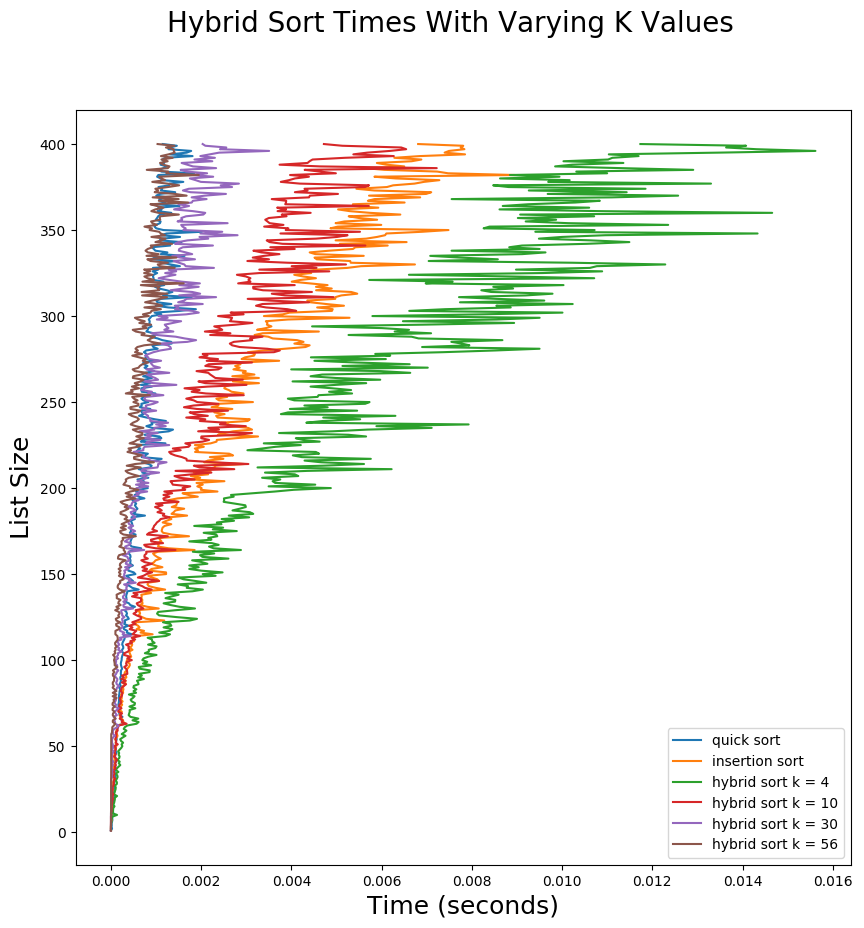

In [53]:
# switch over wouldn't be obvious with larger sample size than 100
PLT_STRT = 0
PLT_END = 400
fg = plt.figure(num=1, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
fg.suptitle('Hybrid Sort Times With Varying K Values', fontsize=20)
plt.ylabel('List Size', fontsize=18)
plt.xlabel('Time (seconds)', fontsize=18)
plt.plot(qs_times[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.plot(is_times[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.plot(hs_times_4[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.plot(hs_times_10[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.plot(hs_times_30[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.plot(hs_times_56[PLT_STRT:PLT_END], tested[PLT_STRT:PLT_END])
plt.legend(['quick sort', 'insertion sort', 'hybrid sort k = 4', 'hybrid sort k = 10', 'hybrid sort k = 30', 'hybrid sort k = 56'], loc='lower right')
plt.show()

**Results:** The Hybrid Quicksort with k=56 was the fastest as expected. After graphing the results it becomes apparent that it's not actually faster than a regular implementation of Qiucksort at all after 500 elements in the list, but it can also be seen that it's faster below 500 elements. The other k values are all consistently slower than a regular Quicksort implementation with a random pivot.

**Discussion:** It's odd that Hybrid Quicksort is consistently faster for 1 <= n <= 300, but normal Quicksort is consistently faster for  500 <= n <= 1000. This could be because the partitioned lists will have a greater variance in values with a larger n once they get down to a size of 56 causing Insertion Sort to make more swaps.

**Conclusion:** With a list size of n < 400 and a k value of 56 a Hybrid Insertion Quicksort is faster than normal Quicksort, with n > 500 a normal implementation of Quicksort is fastest.

**Q3** Binary Search Trees vs. Hash Tables: In the C++standard library, 
std::multiset can be used to easily store values ina balanced binary tree.
Likewise std::unordered_multisetcan be used to store values in a hash table.
In theory a hash table should be faster for insertions and deletions, but how much faster?
Compare the two for insertion of n=10, n=100, n=1000, etc, -- as high as you need to go for at 
least one of the data structures to take more than 3 seconds to run. Draw a graph comparing the performance.
You may use binary tree and hash table implementations in another language if you prefer not to use C++.

**Hypothesis:**The hash table function will be significantly faster than the binary search tree. Inserting and deleting into a hash table is a constant time O(1) where the BST is O(log(n)). It won’t be very noticeable when the insert amount is low but the more items need to insert the more time will be needed. Once the number of inserts gets above 100 the more time required should be noticeable.

**Method:** We have both insert function for a BST and for the hash table we are using python’s dictionary which uses a hash table. Will be using a loop to generate input and will be increasing the number of inserts in each case by a factor of 10 up to 1 million inputs. 


In [12]:
#bst implementation
#From https://www.geeksforgeeks.org/binary-search-tree-set-1-search-and-insertion/
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key
 
# A utility function to insert a new node with the given key
def insert(root,node):
    if root is None:
        root = node
    else:
        if root.val < node.val:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

# A utility function to do inorder tree traversal
def inorder(root):
    if root:
        inorder(root.left)
        print(root.val)
        inorder(root.right)

In [55]:
# insertion time testing for different datastructures
def test_ins_bst(insertions):
    # takes number of insertions to test returns time taken for insertions
    testcases = [math.floor(n*10000) for n in np.random.random((1,insertions))[0]]
    root = Node(0)
    start = time.time()
    for cnt, n in enumerate(testcases):
        insert(root, Node(n))
    return time.time() - start # current-time - start-time

def test_ins_ht(insertions):
    testcases = [math.floor(n*10000) for n in np.random.random((1,insertions))[0]]
    ht = {}
    start = time.time()
    for cnt, n in enumerate(testcases):
        ht[n] = n
    return time.time() - start # current-time - start-time

bst_times = []
ht_times = []

insertions = 1000
insert_l = [insertions]
bst_t = test_ins_bst(insertions)
ht_t = test_ins_ht(insertions)
cnt = 0
while bst_t <= 3 and ht_t <= 3:
    insertions *= 10
    insert_l.append(insertions)
    bst_times.append(bst_t)
    ht_times.append(ht_t)
    bst_t = test_ins_bst(insertions)
    ht_t = test_ins_ht(insertions)
    cnt += 1

bst_times.append(bst_t)
ht_times.append(ht_t)
if bst_t < ht_t:
    ht = True
    bst = False
else:
    bst = True
    ht = False

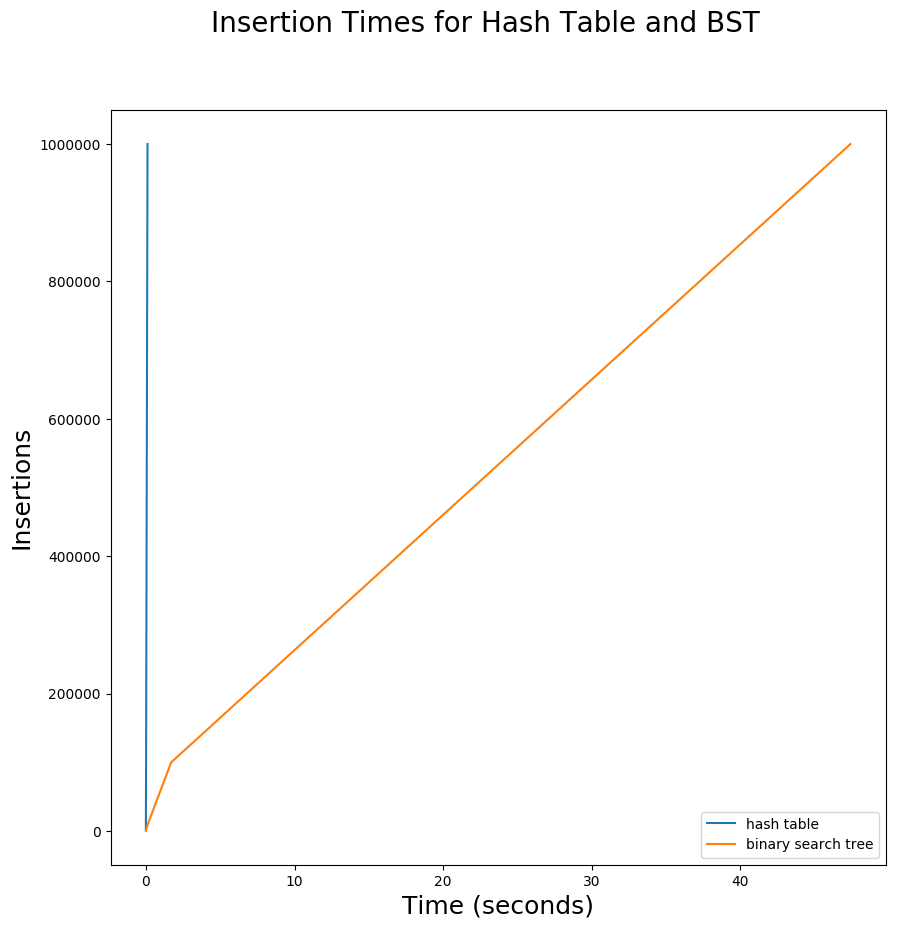

In [57]:
fg = plt.figure(num=1, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')

fg.suptitle('Insertion Times for Hash Table and BST', fontsize=20)
plt.ylabel('Insertions', fontsize=18)
plt.xlabel('Time (seconds)', fontsize=18)

plt.plot(ht_times,insert_l)
plt.plot(bst_times, insert_l)

plt.legend(['hash table', 'binary search tree'], loc='lower right')
plt.show()

**Results:**
The hash table insert function ran at constant time and the BST inserted at O(log(n)) as expected. The BST hit the 3 second limit before the hash table.


**Discussion:**
Nothing was surprising in this test, the hash table insert function was in constant time and the BST insertion was at O(log(n)). The hash table insert was significantly faster than the BST insertion in each case and as expected the BST hit the 3 second limit first.


**Conclusion:**
In the cases tested up to 1000 inserts, the hash table insert function was faster in all cases than the BST insert function.


**Q4**
vs. Vectors : In C++, std::vector is typically considered a poor choice for a sorted container because
for ever y insertion, all subsequent values must be shifted to make room for it. 
The net effect should be linear - time insertions. Modern processors, however, can move whole blocks of 
memory at once . How efficient can a sorted vector be ? Implement one where you use binary search to quickly 
find the insertion position o f a new value in the vector, and then use the vector member function insert
(iterator , value ) to place the new value into the vector (insert will efficiently adjust elements that 
need to be moved). Graph the time your sorted vector takes as compared to std::multiset, which you already 
looked at in problem 3 . Again, you may use a language other than C++ as long as you pick equivalent 
data structures

**Hypothesis**
Inserting into a sorted array will be much slower than a BST and even more slower than a hash table. Big O notation for a sorted list is O(n), linear time, right away it will be noticeable slower than both the hash table and BST.


**Method:**
A binary search was used to locate the place the inserted item is supposed to go then just an insert into the location. A loop was created to generate random input for the graphing of the insert function, with list sizes ranging from 100 to 10000, incremented by 100.

In [59]:
#bst implementation
#From https://www.geeksforgeeks.org/binary-search-tree-set-1-search-and-insertion/
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key
 
# A utility function to insert a new node with the given key
def insert(root,node):
    if root is None:
        root = node
    else:
        if root.val < node.val:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

# A utility function to do inorder tree traversal
def inorder(root):
    if root:
        inorder(root.left)
        print(root.val)
        inorder(root.right)

# using bisect insort
def test_insort(insertions):
    testcases = [math.floor(n*10000) for n in np.random.random((1,insertions))[0]]
    tst_lst = []
    start = time.time()
    for cnt, n in enumerate(testcases):
        insort(tst_lst, n)
    return time.time() - start # current-time - start-time = total time

def test_ins_bst(insertions):
    # takes number of insertions to test returns time taken for insertions
    testcases = [math.floor(n*10000) for n in np.random.random((1,insertions))[0]]
    root = Node(0)
    start = time.time()
    for cnt, n in enumerate(testcases):
        insert(root, Node(n))
    return time.time() - start # current-time - start-time

In [60]:
#testing
insort_times = []
bst_times = []
tested = []
for i in range(100, 10000, 100):
    tested.append(i)
    insort_times.append(test_insort(i))
    bst_times.append(test_ins_bst(i))

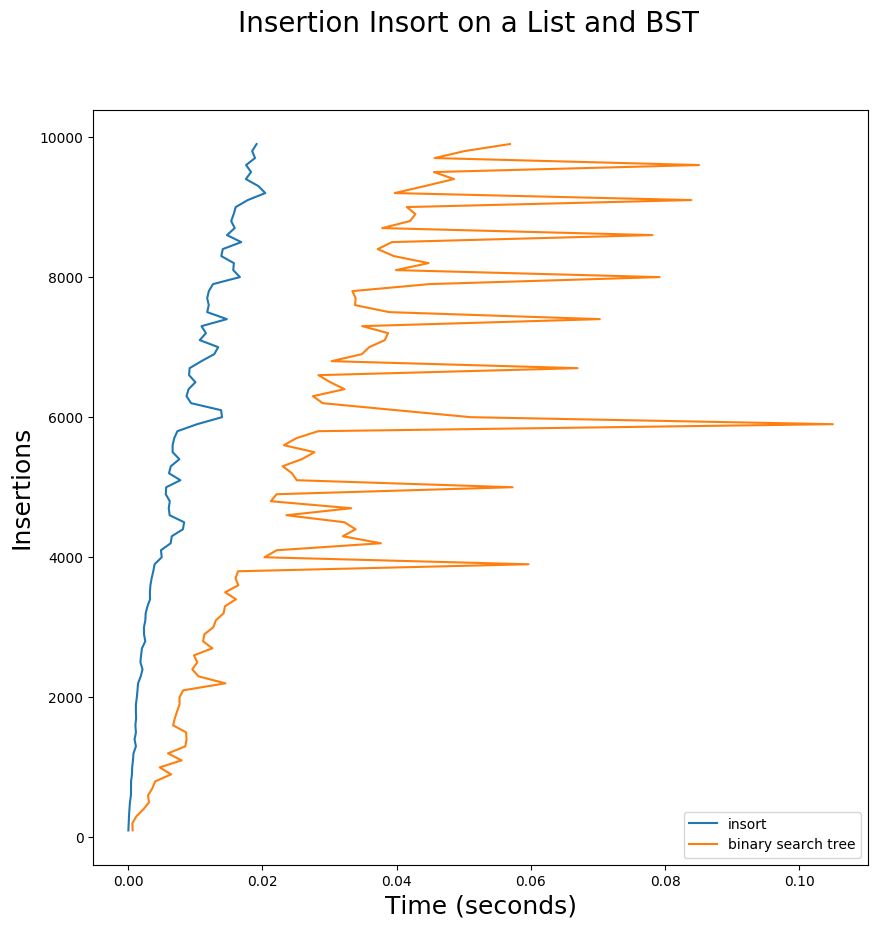

In [61]:
fg = plt.figure(num=1, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')

fg.suptitle('Insertion Insort on a List and BST', fontsize=20)
plt.ylabel('Insertions', fontsize=18)
plt.xlabel('Time (seconds)', fontsize=18)

plt.plot(insort_times,tested)
plt.plot(bst_times, tested)

plt.legend(['insort', 'binary search tree'], loc='lower right')
plt.show()

**Results:**
The sorted list performed insertion at a much faster rate than the BST. At no time was the BST faster than the sorted list during the insert function test.


**Discussion:**
Surprisingly the insert function for a sorted list was faster than the insertion for a BST. This is probably due to the improvements in modern computing and the use of the bisect module in Python. The BST was taking approximately at O(log(n)) and the sorted list was close to linear time for approximately the first 200 insertions then it started to behave like O(log(n)).

**Conclusion:** Using the built in insort method from the bisect module in Python is much faster than inserting into a BST.